# Main notebook

This notebook can be used to run the misinfo model with various parameters.


## Imports

In [1]:
from misinfo_model import *
from visualization import *
from agents import *
import time
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")


## Parameters

In [2]:
visualize = False
n_agents = 1000
agent_ratio = {NormalUser.__name__: 0.99, Disinformer.__name__: 0.01}
n_edges = 3
media_literacy_intervention = (0.2, SelectAgentsBy.RANDOM)
ranking_intervention = False

max_run_length = 60

## Model run

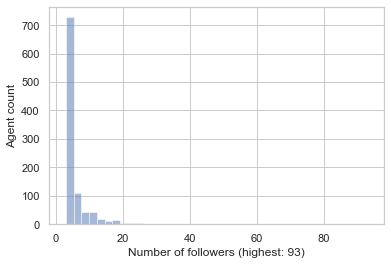

In [3]:
model = MisinfoPy(n_agents=n_agents,
                  n_edges=n_edges,
                  agent_ratio=agent_ratio,
                  media_literacy_intervention=media_literacy_intervention,
                  ranking_intervention=ranking_intervention)

## Visualize initial belief distribution

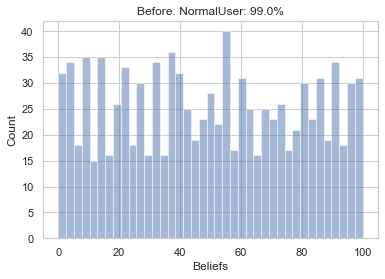

In [4]:
# Overview of the agents' belief distribution at the start
data = [agent.beliefs[str(Topic.VAX)] for agent in model.schedule.agents]

bins = np.linspace(math.ceil(min(data)),
                   math.floor(max(data)),
                   40)  # fixed number of bins

plt.xlim([min(data) - 5, max(data) + 5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title(f'Before. NormalUser: {agent_ratio[NormalUser.__name__]*100}%')
plt.xlabel('Beliefs')
plt.ylabel('Count')

plt.show()

In [5]:
print(f"Starting")
start_time = time.time()
for i in range(max_run_length):
    model.step()
    if i % 10 == 0:
        print(f"step {i} done")

run_time = round(time.time() - start_time, 2)
print(f"With {max_run_length} steps, runtime is {run_time}")

Starting
step 0 done
step 10 done
step 20 done
step 30 done
step 40 done
step 50 done
With 60 steps, runtime is 25.82


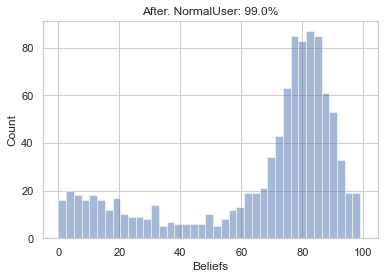

In [6]:
# Overview of the agents' belief distribution at the end
data = [agent.beliefs[str(Topic.VAX)] for agent in model.schedule.agents]

bins = np.linspace(math.ceil(min(data)),
                   math.floor(max(data)),
                   40)  # fixed number of bins

plt.xlim([min(data) - 5, max(data) + 5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title(f'After. NormalUser: {agent_ratio[NormalUser.__name__]*100}%')
plt.xlabel('Beliefs')
plt.ylabel('Count')

plt.show()